In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import logging
logging.basicConfig()

from pathlib import Path
from pprint import pprint

from tqdm import tqdm, trange

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

import fish

In [2]:
NOTEBOOK_NAME = "domains"

HERE = Path.cwd().absolute()
DATA = HERE.parent / "data"
OUT = HERE / "out" / Path(NOTEBOOK_NAME).stem
print(HERE)
print(DATA)
print(OUT)

D:\projects\fish\dev
D:\projects\fish\data
D:\projects\fish\dev\out\domains


DEBUG:fish.io:Cached read from D:\projects\fish\data\D1-1.hsv.cached


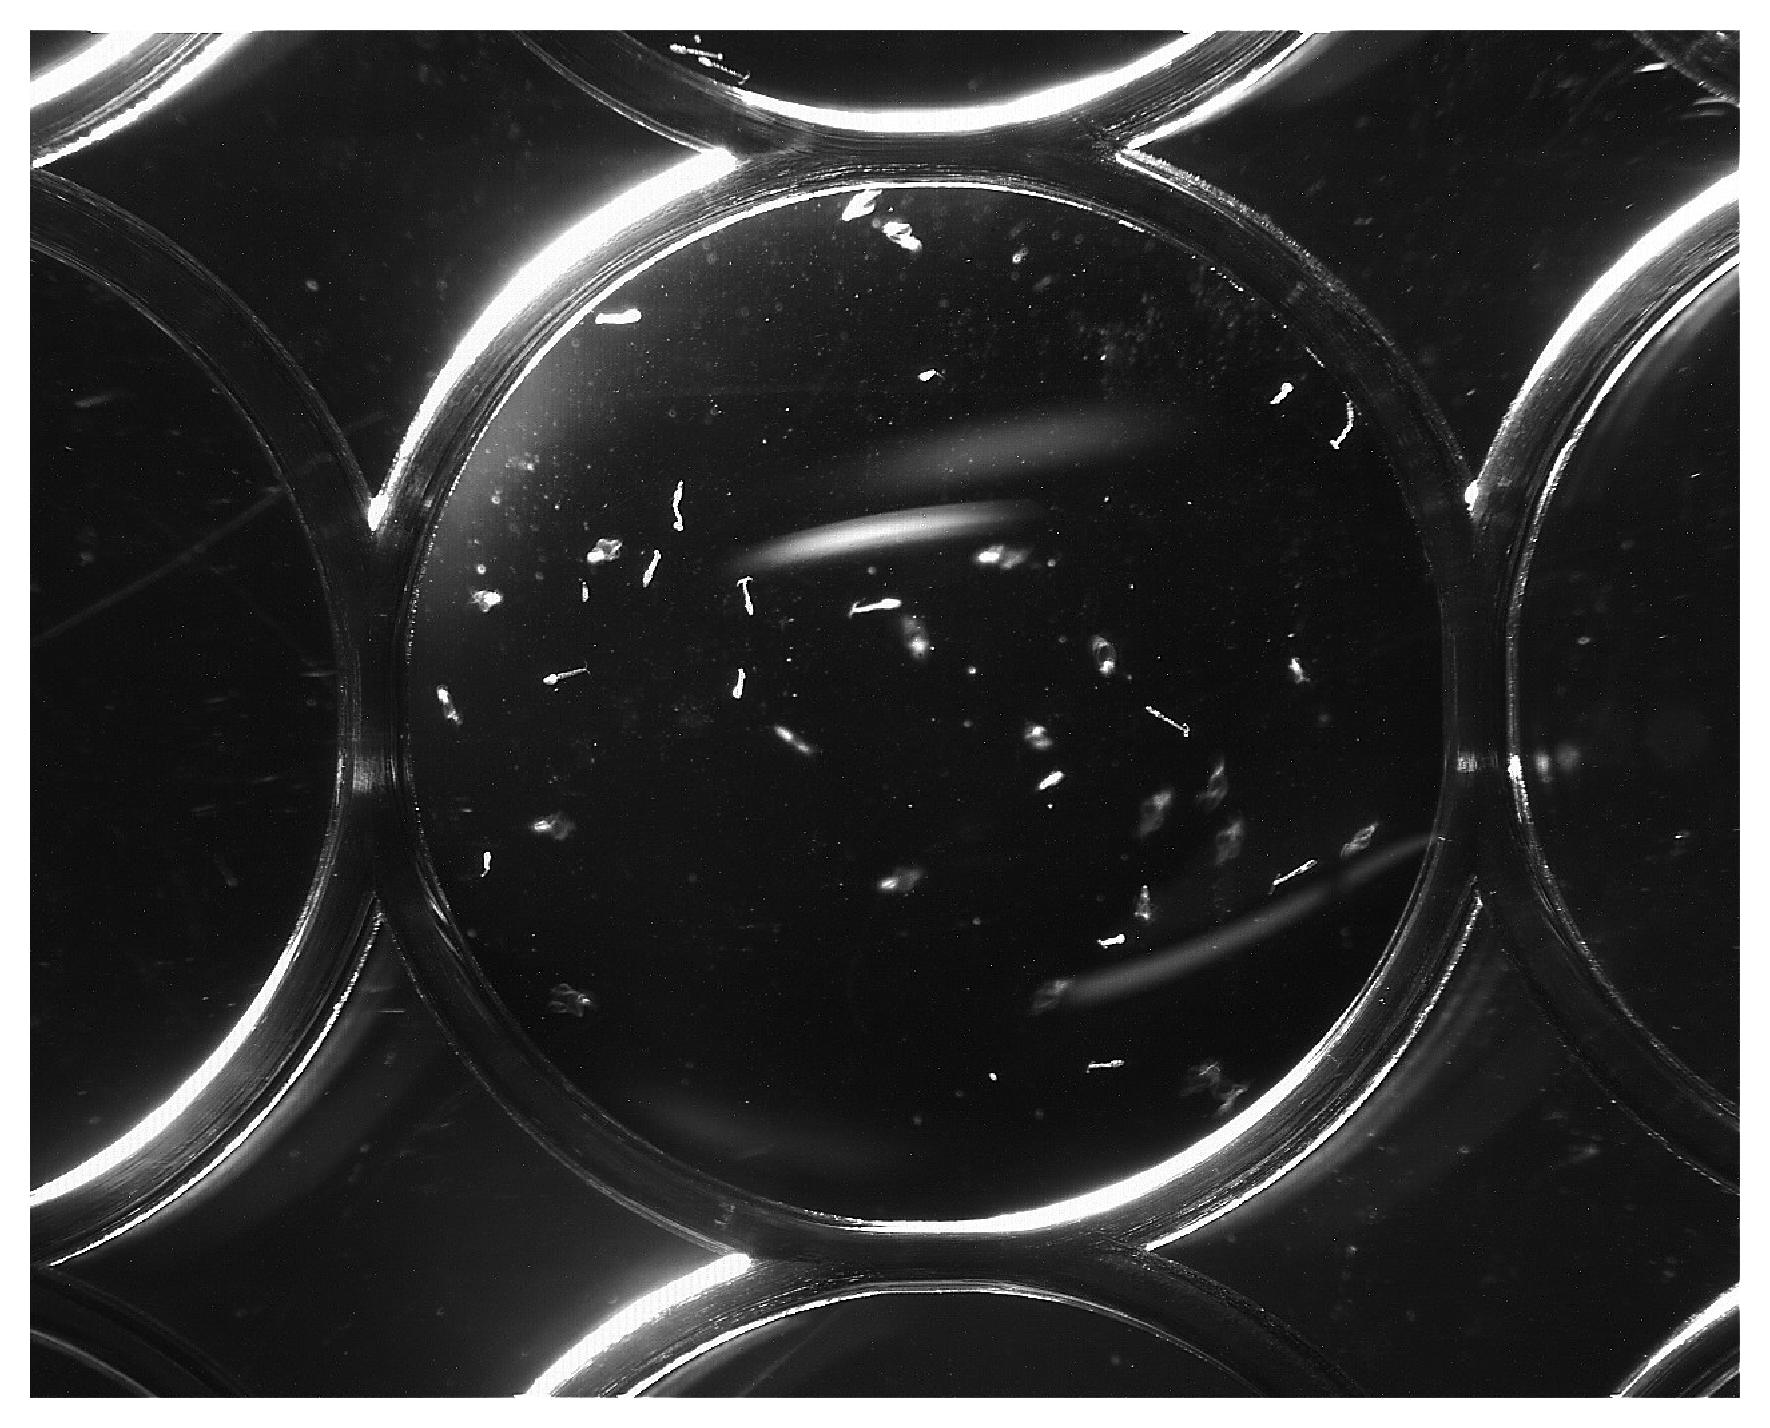

In [3]:
frame = fish.cached_read(DATA / "D1-1.hsv")[100]

fish.show_frame(frame)

In [6]:
center = np.array([200, 400])

xx, yy = fish.domain(center, (100, 150), (11, 15))

xx, yy = fish.rotate_domain_xy(xx, yy, angle = 0)

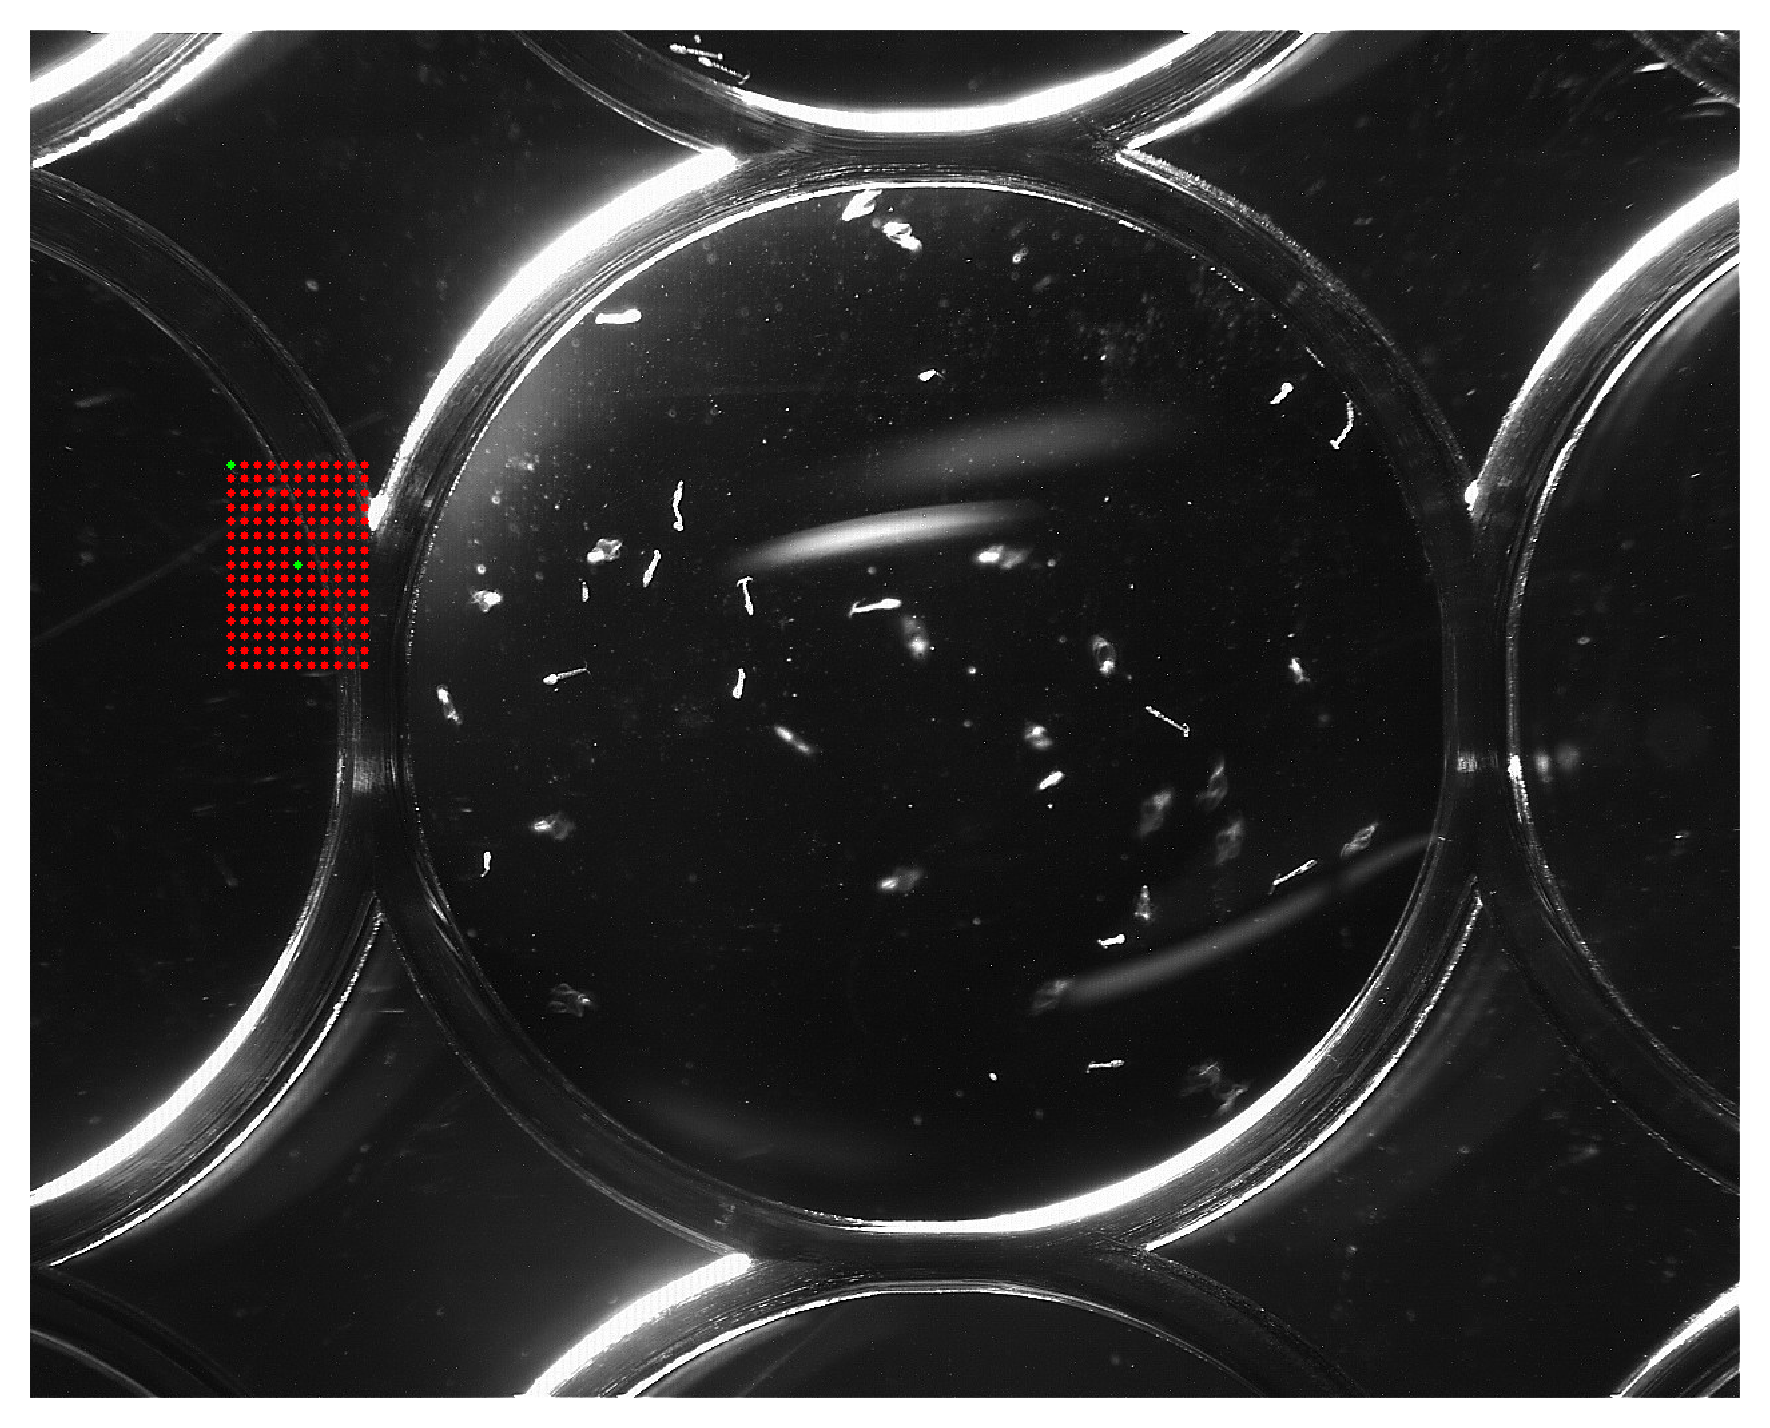

In [7]:
img = fish.bw_to_bgr(frame)

for x_idx, y_idx in fish.iter_domain_indices(xx):
    x = xx[x_idx, y_idx]
    y = yy[x_idx, y_idx]
    img = fish.draw_circle(
        img,
        center = (x, y),
        radius = 3,
        color = fish.GREEN if x_idx == y_idx == 0 else fish.RED,
        thickness = -1,
    )

img = fish.draw_circle(
    img,
    center = tuple(center),
    radius = 3,
    color = fish.GREEN,
    thickness = -1,
)

fish.show_frame(fish.bgr_to_rgb(img))
